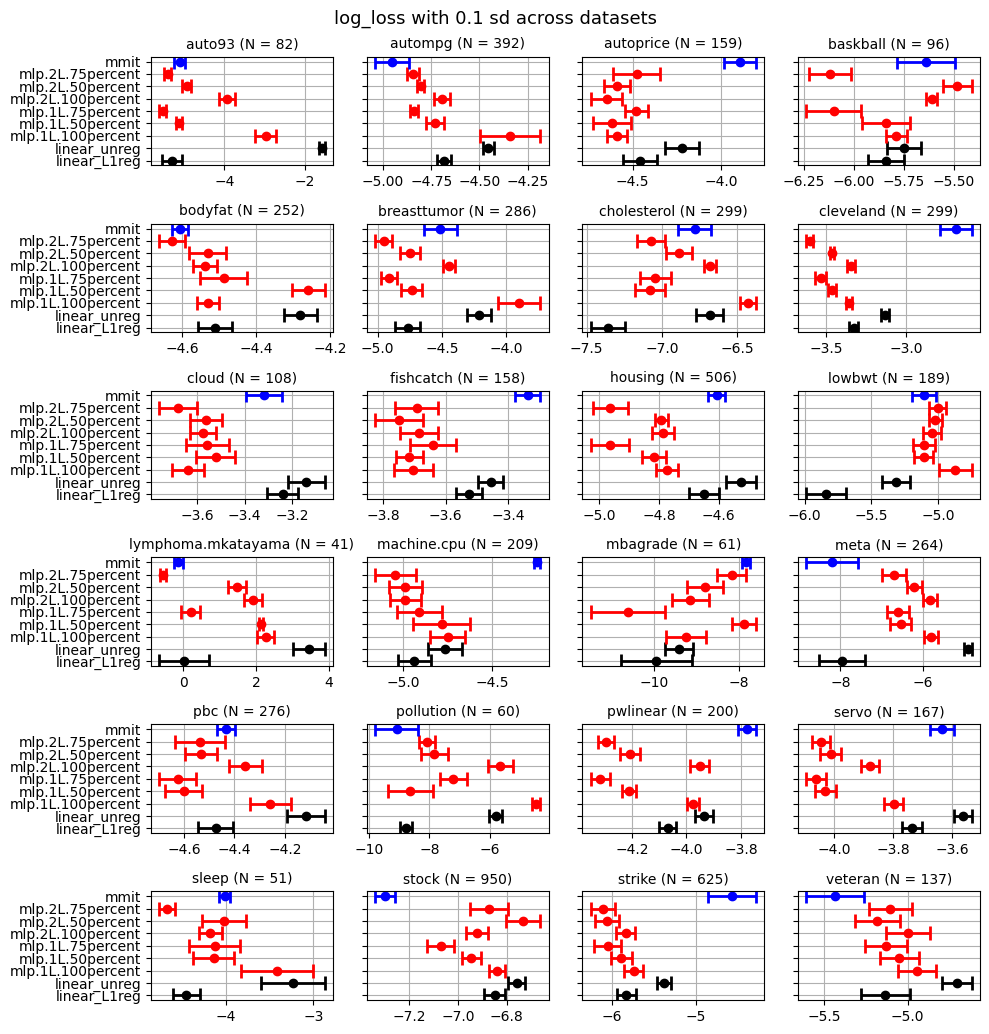

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

folder_path = '../data'
datasets = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
datasets = [name for name in datasets if name not in 
            ['simulated.sin', 'simulated.abs', 'simulated.linear', 'wisconsin', 'vineyard', 'sensory', 'elusage', 
             'pyrim', 'echomonths', 'fruitfly', 'lymphoma.tdh', 'autohorse', 'cpu', 'triazines', 'pharynx']]

def plot(ax, dataset, index, num_datasets):
    datasize = pd.read_csv(f'../data/{dataset}/targets.csv').shape[0]

    # Load the CSV file
    df = pd.read_csv(f'../loss_csvs/{dataset}.csv')

    # Get log of loss
    df['loss'] = df['loss'].replace(0, np.nan)
    df['loss'] = np.log(df['loss'])
    df['loss'] = df['loss'].fillna(df['loss'].max())

    # Group by 'method' and calculate the mean and standard deviation of 'loss'
    grouped = df.groupby('method')['loss'].agg(['mean', 'std'])
    
    # Determine colors
    colors = [
        'red' if method.startswith('mlp') else 
        'blue' if method.startswith('mmit') else 
        'black' 
        for method in grouped.index
    ]

    # Plot mean loss for each method with methods on the y-axis
    for i, method in enumerate(grouped.index):
        ax.errorbar(grouped['mean'].iloc[i], method, xerr=0.2*grouped['std'].iloc[i], fmt='o', color=colors[i], capsize=5, capthick=2, elinewidth=2, linestyle='none')

    # Set title with a smaller font size
    ax.set_title(f'{dataset} (N = {datasize})', fontsize=10)  # Reduced font size

    # Always show x-ticks for all datasets in the row
    ax.tick_params(axis='x', labelsize=10)

    # Show or hide y-ticks based on column index
    if index % 4 == 0:
        ax.set_yticks(grouped.index)
        ax.set_yticklabels(grouped.index)
    else:
        ax.set_yticklabels([])

    ax.grid(True)

# Create subplots
num_datasets = len(datasets)
fig, axes = plt.subplots(nrows=(num_datasets // 4) + (num_datasets % 4 > 0), ncols=4, figsize=(10, (num_datasets // 4 + 1) * 1.5))  # Reduced height

# Flatten axes array if there is only one row
if num_datasets <= 4:
    axes = [axes]

# Plot each dataset
for i, dataset in enumerate(datasets):
    row, col = divmod(i, 4)
    plot(axes[row][col], dataset, i, num_datasets)

# Remove unused subplots
for j in range(num_datasets, len(axes.flat)):
    fig.delaxes(axes.flat[j])

# Adjust layout to make plots closer
plt.subplots_adjust(wspace=0.01, hspace=0.01)  # Reduced row spacing

fig.suptitle('log_loss with 0.1 sd across datasets', fontsize=13)
plt.tight_layout()
plt.savefig("comparison.pdf")
plt.savefig("comparison.png")
plt.show()